##merge

In [122]:
import pandas as pd
import numpy as np
import random

In [123]:
left = pd.DataFrame({
'id':[1,2,3,4,5],
'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
'subject_id':['sub1','sub2','sub4','sub6','sub5']})

In [124]:
left

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [125]:
right = pd.DataFrame(
{'id':[1,2,3,4,5],
'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [126]:
right

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


In [127]:
print(pd.merge(left,right,on=['id','subject_id']))

   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty


In [128]:
pd.merge(left,right, on = 'subject_id', how = 'outer')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,NaN,NaN,sub3,3.0,Bran
3,3.0,Allen,sub4,2.0,Brian
4,5.0,Ayoung,sub5,5.0,Betty
5,4.0,Alice,sub6,4.0,Bryce


In [129]:
pd.merge(left, right, on = 'subject_id' , how ='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [130]:
pd. merge(left, right, on = 'subject_id' , how = "right")

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


In [131]:
pd.merge(left, right, on = 'subject_id' , how = 'right' , suffixes = ('_left', '_right')) # id_left, name_left, id_right, name_right로 바꿔줌

,id_left,Name_left,subject_id,id_right,Name_right
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


##concat

In [132]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [133]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [134]:
pd.concat([df1, df2]) #위아래로 붙이기

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [135]:
pd.concat([df1 , df2] , axis = 1) #옆으로 붙이기

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


#대출 데이터 병합

In [136]:
#파일열기
train = pd.read_csv('/content/loan_train.csv')
test = pd.read_csv('/content/loan_test.csv')

In [137]:
#모양확인
train.shape, test.shape # 지금 열이 13, 12로 다름 따라서 test에 하나 붙여줘야됨

((614, 13), (367, 12))

In [138]:
# 칼럼이름
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [139]:
# 테스트에 칼럼을 생성 한후 합치기
test['Loan_Status'] =1

In [140]:
# 테스트 사이즈 체크
test.shape

(367, 13)

In [141]:
# 위 아래 붙이기
loan = pd.concat([train, test])
loan.shape

(981, 13)

In [142]:
#피벗 테이블

#피벗테이블


In [143]:
A = ['foo'] * 5 + ['bar'] * 4
A

['foo', 'foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar']

In [144]:
B = ['one'] * 3 + ['two'] * 2 + ['one'] * 2 + ['two'] * 2
B

['one', 'one', 'one', 'two', 'two', 'one', 'one', 'two', 'two']

In [145]:
import random
opt = ['small' , 'large']
C = [random.choice(opt) for i in range(9)] #한줄 두줄 이해 안됨 ..?
C

['large',
 'small',
 'small',
 'small',
 'small',
 'large',
 'small',
 'small',
 'large']

In [146]:
#D는 1에서 7사이에 랜덤하게 만들기
import random
D = [random.randint(1,7) for i in range(9)]
D

[3, 6, 5, 6, 2, 3, 2, 1, 3]

In [147]:
#E는 2에서 9사이에 랜덤하게 만들기
import random
E = [random.randint(2,9) for i in range(9)]
E

[7, 7, 3, 7, 8, 3, 9, 2, 4]

In [148]:
df = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D, 'E':E})

In [149]:
import numpy as np

In [150]:
tab = pd.pivot_table(df, index = ["A", "B"], columns = "C", values = "D", aggfunc = np.sum)
tab

<ipython-input-150-26c3ce9f4faa>:1: FutureWarning: The provided callable <function sum at 0x7991ea3e72e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tab = pd.pivot_table(df, index = ["A", "B"], columns = "C", values = "D", aggfunc = np.sum)


C        large  small
A   B                
bar one    3.0    2.0
    two    3.0    1.0
foo one    3.0   11.0
    two    NaN    8.0

<Axes: xlabel='A,B'>

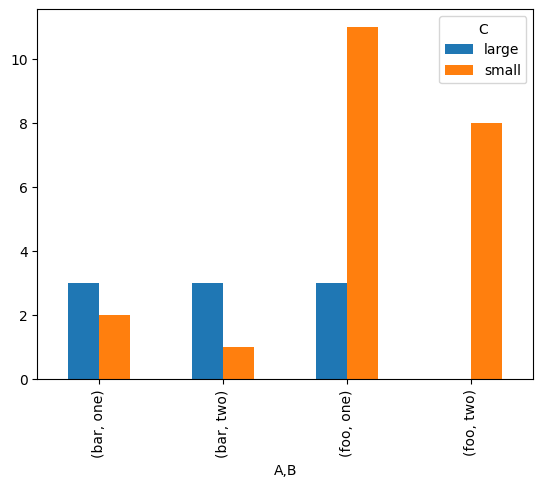

In [151]:
tab.plot(kind='bar')

In [152]:
# 고객 데이터를 피벗테이블을 이용해서 분석
customer = pd.read_excel('/content/xlmd_customer.xls')
customer.head()

,CUST ID,REGION,RENT VS. OWN,NUM HOUSEHOLD,ANNUAL INCOME,TOTAL PURCHASES,NUM PURCHASES
0,1,North,Own,1,10K-25K,38,1
1,2,South,Own,4,100K+,30,4
2,3,North,Rent,3,25K-50K,19,3
3,4,West,Own,5,25K-50K,21,6
4,5,East,Own,6,50K-100K,35,7


In [153]:
customer.shape

(487, 7)

In [154]:
# 컬럼이름 확인
customer.columns

Index(['CUST ID', 'REGION', 'RENT VS. OWN', 'NUM HOUSEHOLD', 'ANNUAL INCOME',
       'TOTAL PURCHASES', 'NUM PURCHASES'],
      dtype='object')

In [155]:
#데이터 타입
customer.dtypes

,0
CUST ID,int64
REGION,object
RENT VS. OWN,object
NUM HOUSEHOLD,int64
ANNUAL INCOME,object
TOTAL PURCHASES,int64
NUM PURCHASES,int64


In [156]:
#피벳 테이블로 요약
tab = pd.pivot_table(customer, index=['REGION','RENT VS. OWN' ] , columns = ['NUM HOUSEHOLD'] , values = 'TOTAL PURCHASES' , aggfunc = np.sum)
tab

<ipython-input-156-77da1853b718>:2: FutureWarning: The provided callable <function sum at 0x7991ea3e72e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tab = pd.pivot_table(customer, index=['REGION','RENT VS. OWN' ] , columns = ['NUM HOUSEHOLD'] , values = 'TOTAL PURCHASES' , aggfunc = np.sum)


NUM HOUSEHOLD          1    2     3     4     5     6    7
REGION RENT VS. OWN                                       
East   Own           312  455  1195  1546   731  1039  515
       Rent          694  534   807   665   620   562  558
North  Own           149  820   806   542  1014   782  147
       Rent          420  528  1325   576  1013   465  175
South  Own            48  632   584  1039   392   357  274
       Rent          179  695   513   890   324   281  204
West   Own           438  292   797  1306   536   839  127
       Rent          257  688   606   706   806   301  290

<Axes: xlabel='REGION,RENT VS. OWN'>

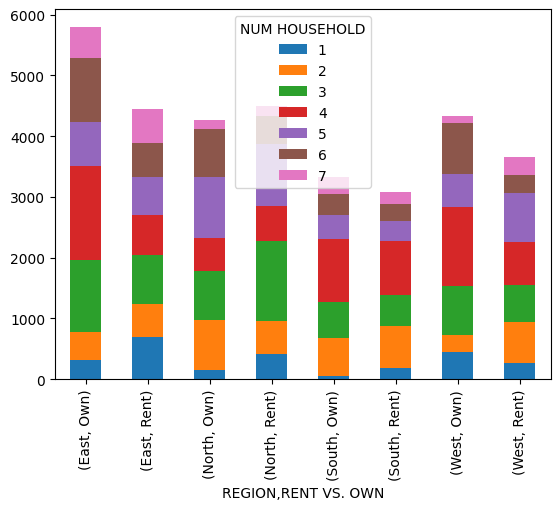

In [157]:
# 피벗 테이블 시각화
tab.plot(kind='bar', stacked = True )

#크로스텝

In [158]:
foo = pd.Categorical(['a', 'b'],
categories=['a', 'b', 'c'])
bar = pd.Categorical(['d', 'e'],
categories=['d', 'e', 'f'])

In [159]:
foo

['a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [160]:
bar

['d', 'e']
Categories (3, object): ['d', 'e', 'f']

In [161]:
table = pd.crosstab(foo, bar,dropna=False) # dropna 집어넣으면 count 되지 않는 것도 포함 시킴
table

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


<Axes: xlabel='row_0'>

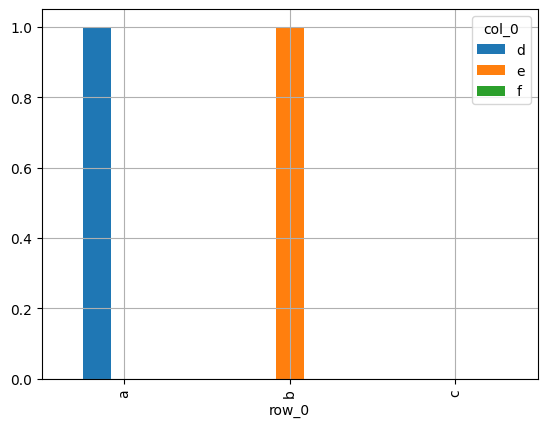

In [162]:
#시각화해서 요약
table.plot(kind ='bar' , grid = True)

#apply함수


In [163]:
df = pd.DataFrame([[4, 9],] * 3,
columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [164]:
df.apply(np.sqrt) #루트 값 적용

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [165]:
df.apply(np.sum, axis=0) #열로 적용

,0
A,12
B,27


In [166]:
df.apply(np.sum, axis=1) #행으로 적용

,0
0,13
1,13
2,13


#map

In [167]:
df.map(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [168]:
#단어의 길이를 리턴 하는 함수
def myfunc(n):
      return len(n)

In [169]:
x = map(myfunc, ('apple', 'banana','cherry')) #튜플의 길이 3 이 아니라 각 단어의 길이를 알고 싶을때 map 사용
list(x)

[5, 6, 6]

#대출 데이터 전처리(계량형 데이터를 범주형 데이터로 !)
범주형은 valuecounts로 바로 할 수 있지만 계량형은 바로 할 수 없기에 cut으로 잘라서 범주형으로 만든 후 valuecounts 실행

In [170]:
#상위 5개
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
#데이터 타입 확인
loan.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [172]:
# 최댓값 , 최솟값 확인
loan.LoanAmount.max() , loan.LoanAmount.min()

(700.0, 9.0)

In [177]:
pd.concat([pd.cut(loan.LoanAmount , bins = [9, 90, 140, 190, 700]), loan.LoanAmount], axis = 1) # 데이터를 상중하로 자르고 싶을때

,LoanAmount,LoanAmount
0,NaN,NaN
1,"(90.0, 140.0]",128.0
2,"(9.0, 90.0]",66.0
3,"(90.0, 140.0]",120.0
4,"(140.0, 190.0]",141.0
...,...,...
362,"(90.0, 140.0]",113.0
363,"(90.0, 140.0]",115.0
364,"(90.0, 140.0]",126.0
365,"(140.0, 190.0]",158.0


In [178]:
pd.cut(loan.LoanAmount , bins = [9, 90, 140, 190,700]).value_counts(sort = False)

,count
LoanAmount,
"(9, 90]",169
"(90, 140]",428
"(140, 190]",227
"(190, 700]",129
